In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

### k-means
Hard-clustering method for grouping data into clusters of similar data points with similar variances
- Mathematically straightforward but computationally intensive
- Chooses centroids (means) to minimize the inertia (cost function)
- Formula for inertia: $\sum(\bar{x}_c - x_i)^2$
    - Sum of squared differences between centroid (mean $\bar{x}_c$) and the datapoints in the cluster ($x_i$)
    - Defines cluster means to get the smallest possible distance between a cluster mean and all data points
- In k-means, means refers to the centroids, and k is the (user provided) number of centroids (and thus the number of clusters)
- Choosing k is basically trial and error
    - Pick a k, look at solution, see if it makes sense, then try other k's
    - Clusters on 'real divisions' will be stable across train and test sets

### k-means algorithm
- Iterative algorithm that eventually converges on a solution
- Starts with random choice of k centroids, then...
    1. Assigns each data point to the nearest centroid
    2. Creates new centroids by taking the mean of all the data points assigned to each centroid
    - Algorithm stops when the difference between old and new centroids is lower than a given threshold
- Bad starting centroid values can cause k-means to arrive at a suboptimal solution
- Should try the algorithm a few times with different starting centroids
    - Sklearn has a kmeans++ options for initializing centroids that are distant from each other
    - This is less likely to end in a flawed solution

### Assumptions
- Assumes underlying 'true' clusters are radially symmetrical (isotropic)
    - Uniform in all directions
    - Edges curve outward
- Also assumes all clusters have similar variances
    - [Sklearn demonstration of this assumption](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)

### Speed
k-means runs more slowly on high dimensional data
- Computationally demanding to measure distance between data point and mean in high dimensional spaces
- Can run PCA first and run k-means on reduced data
- Alternatively, can use sklearn's MiniBatchKMeans
    - Randomly samples subsets of the training data in each iteration
    - Will not produce an as-optimal solution as regular k-means, but much faster

## Applying k-means on heart disease data

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv',
    header=None, error_bad_lines=False
)

#define features and outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

#impute 0 for missing values (marked with ? in this data)
X = X.replace(to_replace='?', value=0)

#binarize y so that 1 means heart disease diagnosis, 0 means no diagnosis
y = np.where(y > 0, 0, 1)

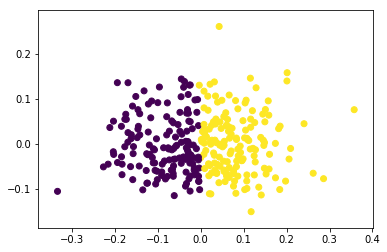

comparing k-means clusters against the data
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
#normalize data
X_norm = normalize(X)

#pca to 2 components
X_pca = PCA(2).fit_transform(X_norm)

#calculate predicted values
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

#Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.show()

print('comparing k-means clusters against the data')
print(pd.crosstab(y_pred, y))

__Results:__ model is not doing very well, correctly classifying 183 cases but is misclassifying 120 cases

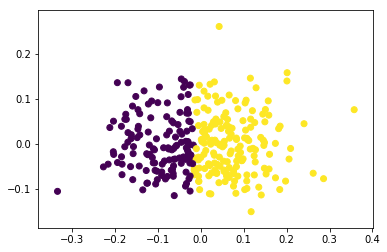

comparing k-means and mini batch k-means solutions
col_0    0    1
row_0          
0      132    0
1       17  154


In [4]:
#try MiniBatch, with 200 datapoints in each batch
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

#add new predicted cluster memberships to dataframe
predict_mini = minibatchkmeans.predict(X_pca)

#Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:,1], c=predict_mini)
plt.show()

#check model against earlier one
print('comparing k-means and mini batch k-means solutions')
print(pd.crosstab(predict_mini, y_pred))

## Drill: more clusters?
Your task is to take the k-means code here and see what happens when you change the value of k. What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

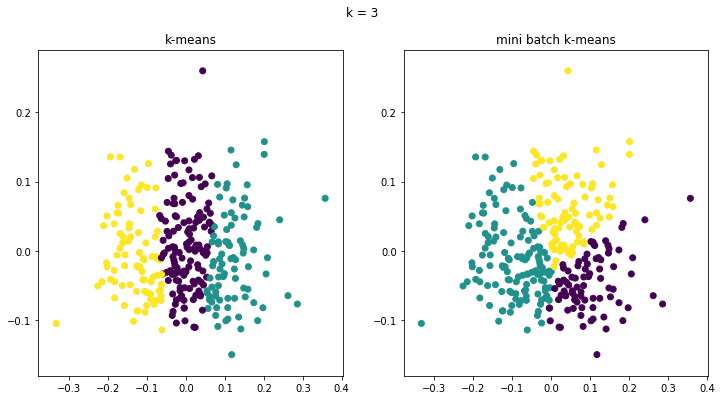

comparing k-means clusters against the data
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33

comparing k-means and mini batch k-means solutions
col_0   0   1   2
row_0            
0      22  62   0
1      48   0  82
2      65  24   0


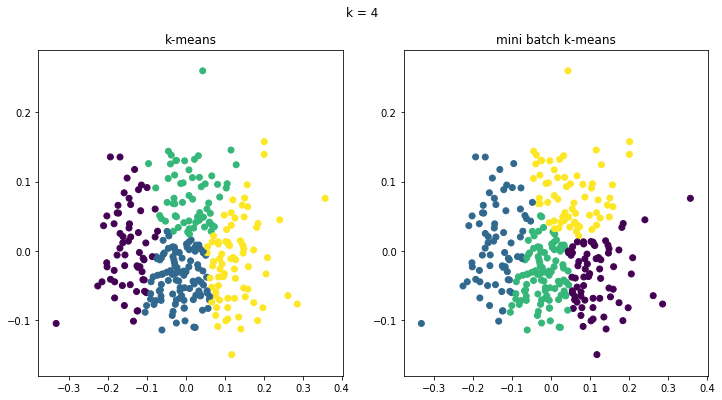

comparing k-means clusters against the data
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3
row_0                
0       0   9   0  62
1      61   2   6   0
2       0  93   6   0
3       0   0  50  14


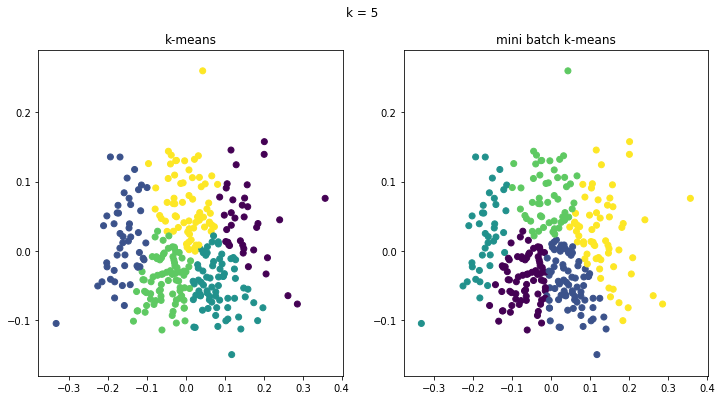

comparing k-means clusters against the data
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4
row_0                    
0       0   8   0  65   0
1       0   0  54  13   9
2       0  39   0   0   0
3       0   1   0   1  51
4      36   0  18   0   8


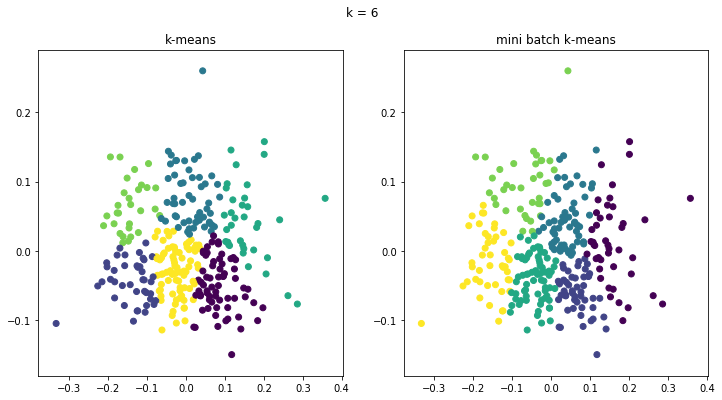

comparing k-means clusters against the data
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5
row_0                        
0      12   0   0  31   0   0
1      45   0   0   0   0   5
2       9   0  35   4   0  11
3       0  10   0   0   0  60
4       0   0  19   0  15   2
5       0  31   0   0  14   0


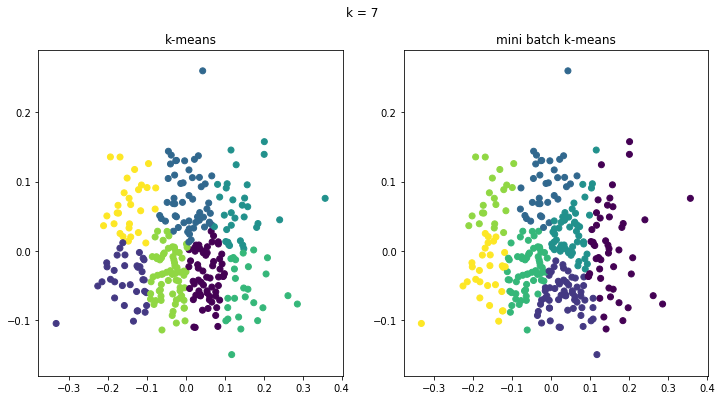

comparing k-means clusters against the data
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6
row_0                            
0       3   0   0  24  21   0   0
1      37   0   0   0   5  17   0
2       0   0  33   0   0   0   2
3      22   0  20   7   0   2   0
4       0   9   1   0   0  49   1
5       0   0   0   0   0   0  21
6       0  25   0   0   0   0   4


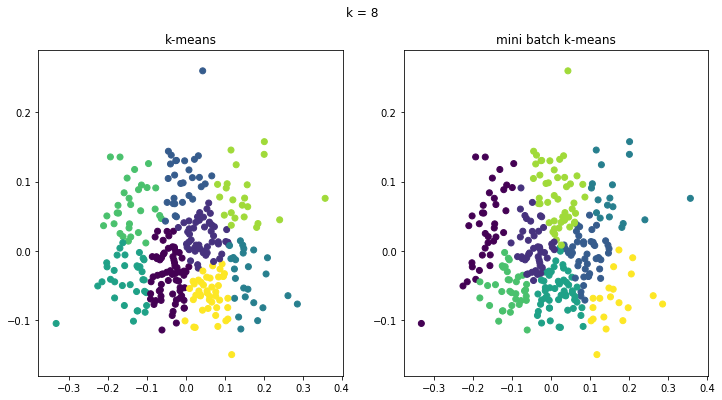

comparing k-means clusters against the data
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6   7
row_0                                
0       0   0   0   0  12  25   0   0
1      33   5   4   0   0   5   0   0
2       0  21   0  10   0   0   2  12
3       0   0   0   0   0   0  18   0
4      21   5   0   0   0   0   0  28
5      13   0   0   0  22   0   0   0
6       0  20  25   0   0   0   2   0
7       0   0   0  15   0   0   0   5


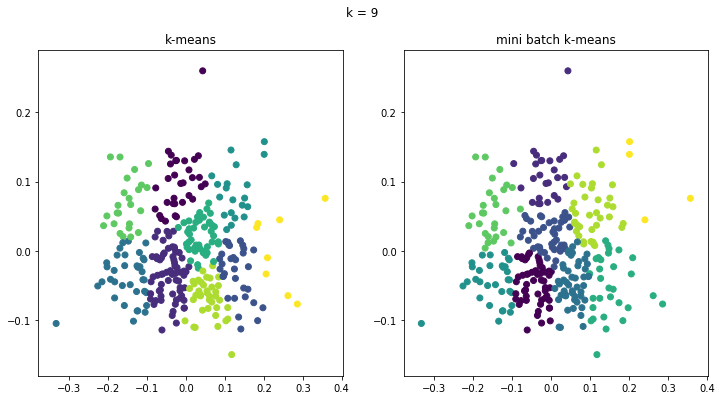

comparing k-means clusters against the data
col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6   7  8
row_0                                   
0       0  53   0   0   0   0   0   1  0
1      25   0   0   0   0   0   1   0  0
2       5  14   0   0   0  25   0   0  0
3       0   0   6   0   0   9   0  34  0
4       0   0   0  32   0   0   0   0  0
5       0   0  22   0   0   0   0   4  4
6       1   0   0   4   0   0  23   0  0
7       1   0   4   0  18  11   0   0  2
8       0   0   0   0   2   0   0   0  2


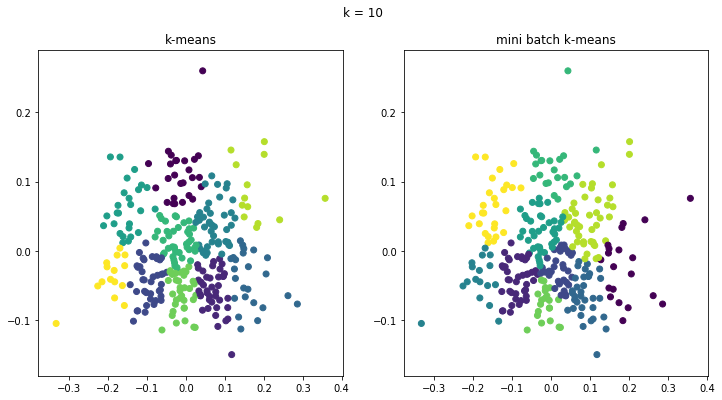

comparing k-means clusters against the data
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4

comparing k-means and mini batch k-means solutions
col_0   0   1   2   3   4   5   6   7  8   9
row_0                                       
0       0   0   0  16   0   0   0   0  4   0
1       0   0  37   0   0   0   1   4  0   0
2       0  11   0   0   6   0   7  10  0   0
3       0  29   0   5   0   0   0   0  0   0
4       0   0   2   0   0   0   0   0  0  15
5       5   0   0   0   2   1  33   0  0   0
6      19   0   0   0   2   0   0   0  1   0
7       0   0   0   0   0   0   0  21  0   0
8       0   1   0   3  33   0   0   0  8   0
9       2   0   0   0   0  25   0   0  0   0


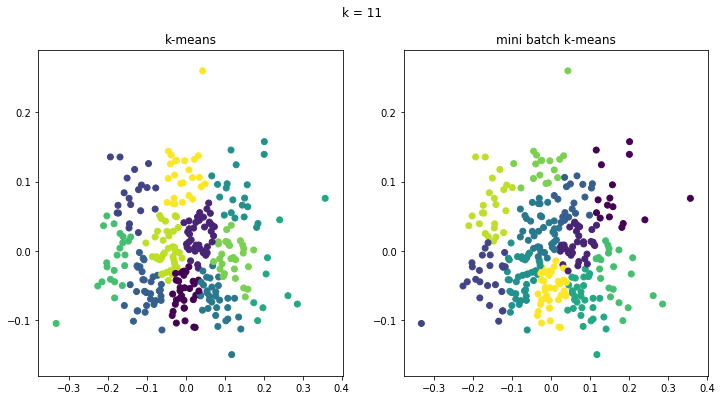

comparing k-means clusters against the data
col_0   0   1
row_0        
0      11  21
1      18  23
2      17   3
3      11  21
4       5  28
5      13   7
6       0   9
7      16   6
8       9  21
9      25  14
10     14  11

comparing k-means and mini batch k-means solutions
col_0  0   1   2   3   4   5   6   7   8   9   10
row_0                                            
0       0   0   0   0   0  14   2   0   0   0   0
1       0  19   0   0   2   0   0   0  12   0   0
2       0   0   0  10   0   0   0  15   0   0   0
3       0   9   0   0   0   6   0   0   0   0   5
4       0  11   1   0   0   0   0   0   0  20   5
5       0   0   0  22   0   0   0   0   0  18   0
6       0   0   0   0  27   0   0   0   4   0   0
7       0   0   0   0   0   0   7   0  14   0   0
8       0   0   2   0   0   0   0   0   0   0  15
9       0   0  17   0   0   0   0   7   0   0   0
10     32   2   0   0   4   0   0   0   0   1   0


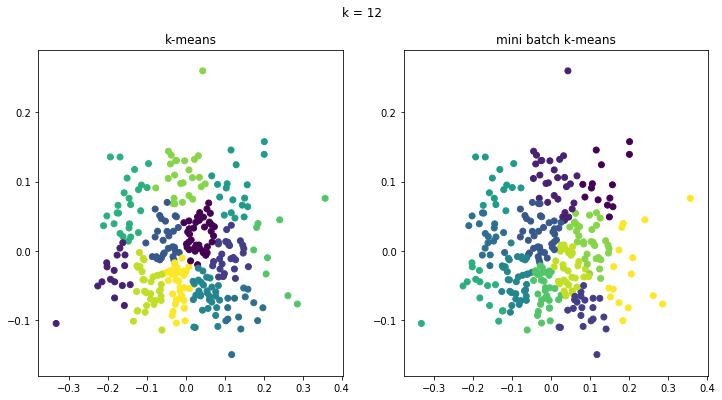

comparing k-means clusters against the data
col_0   0   1
row_0        
0      18  22
1      12   5
2       8  20
3      21   9
4       2  12
5       6  26
6      12   6
7      20   5
8       1   8
9      14  11
10     11  21
11     14  19

comparing k-means and mini batch k-means solutions
col_0  0   1   2   3   4   5   6   7   8   9   10  11
row_0                                                
0       0   0   0   0   0   0  14   0   0   0   0   0
1       7   0   0   0   0   0   1   0   0  22   0   0
2       0   0   0   0   8  14   0   0   0   0   0   0
3      12   0   0  24   0   0   0   0   0   2   0   2
4       0   5   0   0   0   0   0  12   0   0   1   0
5       0   0   0   6   0   0   0   0   0   0  28   1
6       0   0   0   0   0   0   0  13   0   1   0   0
7       0  12   0   0   0   0   0   0   0   0   2   0
8       0   0   0   0   0   2   0   0   0   0   1  29
9       9   0  21   0   0   0   3   0   0   0   0   0
10     12   0   6   0   0  16   0   0   0   0   0   1
11    

In [7]:
k_vals = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for i in k_vals:
    
    #full k-means
    y_pred = KMeans(n_clusters=i, random_state=42).fit_predict(X_pca)
    
    #minibatch
    minibatchkmeans = MiniBatchKMeans(init='random',
                                      n_clusters=i,
                                      batch_size=200)
    minibatchkmeans.fit(X_pca)
    predict_mini = minibatchkmeans.predict(X_pca)
    
    #plots
    plt.figure(figsize=(12, 6))
    plt.suptitle('k = {}'.format(i))
    plt.subplot(121)
    plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
    plt.title('k-means')
    plt.subplot(122)
    plt.title('mini batch k-means')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
    plt.show()

    print('comparing k-means clusters against the data')
    print(pd.crosstab(y_pred, y))
    print('\ncomparing k-means and mini batch k-means solutions')
    print(pd.crosstab(predict_mini, y_pred))